# Building `L-Layers NN Model` from Scratch (Structured)
## by Youssef Hussein

### Contact with me:
[<img align="left" width="35px" style= "padding-right: 10px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/linkedin.svg" />][linkedin]
[<img align="left" width="35px" style= "padding-right: 10px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/upwork.svg" />][upwork]
[<img align="left" width="35px" style= "padding-right: 10px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/github.svg" />][github]
[<img align="left" width="35px" style= "padding-right: 10px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/facebook.svg" />][facebook]

[linkedin]: https://www.linkedin.com/in/just-youssef
[upwork]: https://www.upwork.com/freelancers/~01bf41aeaec6f293c5
[github]: https://github.com/just-youssef
[facebook]: https://www.facebook.com/just.johnny99

In [1]:
# import packages

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.random.seed(5)

In [2]:
# Helper functions: sigmoid

def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cached_Z -- returns Z as well, useful during backpropagation
    """
    
    A = 1/(1+np.exp(-Z))
    cached_Z = Z
    
    return A, cached_Z

In [3]:
# Helper functions: relu

def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cached_Z -- returns Z as well, useful during backpropagation
    """
    
    A = np.maximum(0,Z)
    cached_Z = Z
    
    assert(A.shape == Z.shape)

    return A, cached_Z

In [4]:
# Helper functions: sigmoid_backward

def sigmoid_backward(dA, cached_Z):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cached_Z -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cached_Z
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [5]:
# Helper functions: relu_backward

def relu_backward(dA, cached_Z):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cached_Z -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cached_Z
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [6]:
# Step 1: initialize_parameters

def initialize_parameters_he(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    parameters = {}
    L = len(layers_dims)-1 # integer representing the number of layers

    for l in range(1, L+1):
        parameters[f'W{l}'] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2/layers_dims[l-1]) #He initialization
        parameters[f'b{l}'] = np.zeros((layer_dims[l], 1))
        
        assert(parameters[f'W{l}'].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters[f'b{l}'].shape == (layer_dims[l], 1))

    return parameters

In [7]:
# Step 2.1: linear_forward

def linear_forward(A_prev, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    linear_cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    Z = np.dot(W, A_prev) + b
    
    assert(Z.shape == (W.shape[0], A_prev.shape[1]))
    linear_cache = (A_prev, W, b)
    
    return Z, linear_cache

In [8]:
# Step 2.2: linear_activation_forward

def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    linear_activation_cache -- a python tuple containing "linear_cache" and "activation_cache";
                                stored for computing the backward pass efficiently
    """
    Z, linear_cache = linear_forward(A_prev, W, b)
    
    if activation == "sigmoid":
        A, activation_cache = sigmoid(Z)
    elif activation == "relu":
        A, activation_cache = relu(Z)
        
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    linear_activation_cache = (linear_cache, activation_cache)
    
    return A, linear_activation_cache

In [9]:
# Step 2.3: L_model_forward

def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters()
    
    Returns:
    AL -- last post-activation value
    L_model_caches -- list of caches containing:
                        every linear_activation_cache (there are L of them, indexed from 0 to L-1)
    """

    L_model_caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, linear_activation_cache = linear_activation_forward(A_prev, parameters[f'W{l}'], parameters[f'b{l}'], 'relu')
        L_model_caches.append(linear_activation_cache)
        
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, linear_activation_cache = linear_activation_forward(A, parameters[f'W{L}'], parameters[f'b{L}'], 'sigmoid')
    L_model_caches.append(linear_activation_cache)
    
    assert(AL.shape == (parameters[f'W{L}'].shape[0], X.shape[1]))
    
    return AL, L_model_caches

**Step 3**: Compute the cross-entropy cost $J$, using the following formula: $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{1}$$

The standard way to avoid overfitting is called **L2 regularization**. It consists of appropriately modifying your cost function, from:
$$J = -\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small  y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} \tag{1}$$
To:
$$J_{regularized} = \small \underbrace{-\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} }_\text{cross-entropy cost} + \underbrace{\frac{1}{m} \frac{\lambda}{2} \sum\limits_l\sum\limits_k\sum\limits_j W_{k,j}^{[l]2} }_\text{L2 regularization cost} \tag{2}$$

In [10]:
# Step 3: compute_cost_l2

def compute_cost_l2_reg(AL, Y, parameters, lambd):
    """
    Implement the cost function defined by equation (1).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    m = Y.shape[1]
    L = len(parameters) // 2 # number of layers in the neural network
    Wl_sum_squares = 0
    
    cross_entropy_cost = -1/m * np.sum(np.dot(Y, np.log(AL).T) + np.dot((1-Y), np.log(1-AL).T))

    for l in range(1, L+1):
        Wl_sum_squares += np.sum(np.square(parameters[f'W{l}']))
        
    L2_regularization_cost = lambd/(2*m) * Wl_sum_squares
    
    cost = cross_entropy_cost + L2_regularization_cost
        
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

In [11]:
# Step 4.1: linear_backward

def linear_backward_l2_reg(dZ, linear_cache, lambd):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    linear_cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = linear_cache
    m = A_prev.shape[1]

    dW = 1/m * np.dot(dZ, A_prev.T) + (lambd/m)*W
    db = 1/m * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [12]:
# Step 4.2: linear_activation_backward

def linear_activation_backward_l2_reg(dA, linear_activation_cache, activation, lambd):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    linear_activation_cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = linear_activation_cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        
    dA_prev, dW, db = linear_backward_l2_reg(dZ, linear_cache, lambd)
    
    return dA_prev, dW, db

In [13]:
# Step 4.3: L_model_backward

def L_model_backward_l2_reg(AL, Y, L_model_caches, lambd):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    L_model_caches -- list of caches containing:
                every linear_activation_cache with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the linear_activation_cache with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads[f"dA{l}"] = ... 
             grads[f"dW{l}"] = ...
             grads[f"db{l}"] = ... 
    """
    grads = {}
    L_model_caches = dict(enumerate(L_model_caches, 1))
    L = len(L_model_caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL

    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) # derivative of cost with respect to AL
    
    # Lth layer (SIGMOID -> LINEAR) gradients.
    dA_prev, dW, db = linear_activation_backward_l2_reg(dAL, L_model_caches[L], "sigmoid", lambd)
    grads[f'dA{L-1}'], grads[f'dW{L}'], grads[f'db{L}'] = dA_prev, dW, db
    
    # Loop from l=L-1 to l=1
    for l in range(L-1, 0, -1):
        # lth layer: (RELU -> LINEAR) gradients.
        dA_prev, dW, db = linear_activation_backward_l2_reg(dA_prev, L_model_caches[l],"relu", lambd)
        grads[f'dA{l-1}'], grads[f'dW{l}'], grads[f'db{l}'] = dA_prev, dW, db

    return grads

In [14]:
# Step 5.1: initialize_adam

def initialize_adam(parameters):
    """
    Initializes v and s as two python dictionaries with:
                - keys: "dW1", "db1", ..., "dWL", "dbL" 
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.
    
    Arguments:
    parameters -- python dictionary containing your parameters.
                    parameters[f'W{l}'] = Wl
                    parameters[f'b{l}'] = bl
    
    Returns: 
    v -- python dictionary that will contain the exponentially weighted average of the gradient.
                    v[f'dW{l}'] = ...
                    v[f'db{l}'] = ...
    s -- python dictionary that will contain the exponentially weighted average of the squared gradient.
                    s[f'dW{l}'] = ...
                    s[f'db{l}'] = ...

    """
    
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    s = {}
    
    # Initialize v, s. Input: "parameters". Outputs: "v, s".
    for l in range(1, L+1):
        v[f'dW{l}'] = np.zeros([parameters[f'W{l}'].shape[0], parameters[f'W{l}'].shape[1]])
        v[f'db{l}'] = np.zeros([parameters[f'b{l}'].shape[0], parameters[f'b{l}'].shape[1]])
        s[f'dW{l}'] = np.zeros([parameters[f'W{l}'].shape[0], parameters[f'W{l}'].shape[1]])
        s[f'db{l}'] = np.zeros([parameters[f'b{l}'].shape[0], parameters[f'b{l}'].shape[1]])
    
    return v, s

Recall the general update rule for `adam` is, for $l = 1, ..., L$: 

$$\begin{cases}
v_{W^{[l]}} = \beta_1 v_{W^{[l]}} + (1 - \beta_1) \frac{\partial J }{ \partial W^{[l]} } \\
v^{corrected}_{W^{[l]}} = \frac{v_{W^{[l]}}}{1 - (\beta_1)^t} \\
s_{W^{[l]}} = \beta_2 s_{W^{[l]}} + (1 - \beta_2) (\frac{\partial J }{\partial W^{[l]} })^2 \\
s^{corrected}_{W^{[l]}} = \frac{s_{W^{[l]}}}{1 - (\beta_2)^t} \\
W^{[l]} = W^{[l]} - \alpha \frac{v^{corrected}_{W^{[l]}}}{\sqrt{s^{corrected}_{W^{[l]}}}+\varepsilon}
\end{cases}$$

In [15]:
# Step 5.2: update_parameters_adam

def update_parameters_adam(parameters, grads, v, s, t, learning_rate = 0.01,
                           beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    """
    Update parameters using Adam
    
    Arguments:
    parameters -- python dictionary containing your parameters:
                    parameters[f'W{l}'] = Wl
                    parameters[f'b{l}'] = bl
    grads -- python dictionary containing your gradients for each parameters:
                    grads[f'dW{l}'] = dWl
                    grads[f'db{l}'] = dbl
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    learning_rate -- the learning rate, scalar.
    beta1 -- Exponential decay hyperparameter for the first moment estimates 
    beta2 -- Exponential decay hyperparameter for the second moment estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates

    Returns:
    parameters -- python dictionary containing your updated parameters 
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    """
    
    L = len(parameters) // 2                 # number of layers in the neural networks
    v_corrected = {}                         # Initializing first moment estimate, python dictionary
    s_corrected = {}                         # Initializing second moment estimate, python dictionary
    
    # Perform Adam update on all parameters
    for l in range(1, L+1):
        # Moving average of the gradients. Inputs: "v, grads, beta1". Output: "v".
        v[f"dW{l}"] = beta1*v[f"dW{l}"] + (1-beta1)*grads[f"dW{l}"]
        v[f"db{l}"] = beta1*v[f"db{l}"] + (1-beta1)*grads[f"db{l}"]

        # Compute bias-corrected first moment estimate. Inputs: "v, beta1, t". Output: "v_corrected".
        v_corrected[f"dW{l}"] = v[f"dW{l}"] / (1-beta1**t)
        v_corrected[f"db{l}"] = v[f"db{l}"] / (1-beta1**t)

        # Moving average of the squared gradients. Inputs: "s, grads, beta2". Output: "s".
        s[f"dW{l}"] = beta2*s[f"dW{l}"] + (1-beta2)*np.square(grads[f"dW{l}"])
        s[f"db{l}"] = beta2*s[f"db{l}"] + (1-beta2)*np.square(grads[f"db{l}"])

        # Compute bias-corrected second raw moment estimate. Inputs: "s, beta2, t". Output: "s_corrected".
        s_corrected[f"dW{l}"] = s[f"dW{l}"] / (1-beta2**t)
        s_corrected[f"db{l}"] = s[f"db{l}"] / (1-beta2**t)

        # Update parameters. Inputs: "parameters, learning_rate, v_corrected, s_corrected, epsilon". Output: "parameters".
        parameters[f"W{l}"] -= learning_rate * v_corrected[f"dW{l}"] / (np.sqrt(s_corrected[f"dW{l}"]) + epsilon)
        parameters[f"b{l}"] -= learning_rate * v_corrected[f"db{l}"] / (np.sqrt(s_corrected[f"db{l}"]) + epsilon)

    return parameters, v, s

In [16]:
# Step 6.1: random_mini_batches

def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    mini_batch_size -- size of the mini-batches, integer
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    np.random.seed(seed)            # To make your "random" minibatches the same as ours
    m = X.shape[1]                  # number of training examples
    mini_batches = []
        
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1,m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = int(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k*mini_batch_size: (k+1)*mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k*mini_batch_size: (k+1)*mini_batch_size].reshape((1,mini_batch_size))
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches*mini_batch_size:]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches*mini_batch_size:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [17]:
# Step 6: L_layer_model

def L_layer_model_adam(X, Y, layers_dims, learning_rate = 0.0007, mini_batch_size = 64,beta1 = 0.9,
                       beta2 = 0.999,  epsilon = 1e-8, num_epochs = 10000, print_cost = True, lambd = 0):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    L = len(layers_dims)             # number of layers in the neural networks
    costs = []                       # to keep track of the cost
    t = 0                            # initializing the counter required for Adam update
    seed = 10                        # For grading purposes, so that your "random" minibatches are the same as ours
    m = X.shape[1]                   # number of training examples

    # Parameters initialization
    parameters = initialize_parameters_he(layers_dims)
    v, s = initialize_adam(parameters)
    
    # Optimization loop
    for i in range(num_epochs):
        
        # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)
        cost_total = 0
        
        for minibatch in minibatches:
            
            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch
            
            # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
            AL, L_model_caches = L_model_forward(minibatch_X, parameters)

            # Compute cost.
            cost_total += compute_cost_l2_reg(AL, minibatch_Y, parameters, lambd)

            # Backward propagation.
            grads = L_model_backward_l2_reg(AL, minibatch_Y, L_model_caches, lambd)

            # Update parameters with adam
            t += 1 # Adam counter
            parameters, v, s = update_parameters_adam(parameters, grads, v, s,
                                                      t, learning_rate, beta1, beta2,  epsilon)
        cost_avg = cost_total / m

        # Print the cost every 1000 epoch
        if print_cost and i % 100 == 0:
            print ("Cost after epoch %i: %f" %(i, cost_avg))
            costs.append(cost_avg)
    
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()
    
    return parameters

In [18]:
# Step 7: predict

def predict(X, Y, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X, Y -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    Yhat -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    Yhat = np.zeros((Y.shape[0], m))
    
    # Forward propagation
    probs, L_model_caches = L_model_forward(X, parameters)
    
    # convert probs to 0/1 predictions (Yhat)
    for i in range(0, Yhat.shape[1]):
        if probs[0,i] > 0.5:
            Yhat[0,i] = 1
        else:
            Yhat[0,i] = 0
    
    accuracy = np.sum((Yhat == Y)/m)
    print(f"Accuracy: {accuracy}")
        
    return Yhat

In [19]:
# Step 9.1: load_dataset

import sklearn.datasets

def load_dataset():
    train_X, train_Y = sklearn.datasets.make_moons(n_samples=300, noise=.2)
    test_X, test_Y = sklearn.datasets.make_moons(n_samples=100, noise=.2)
    
    train_X = train_X.T
    train_Y = train_Y.reshape((1, train_Y.shape[0]))
    
    test_X = test_X.T
    test_Y = test_Y.reshape((1, test_Y.shape[0]))
    
    # Visualize the data
    plt.scatter(train_X[0, :], train_X[1, :], c=train_Y, s=40, cmap=plt.cm.Spectral);
    
    return train_X, train_Y, test_X, test_Y

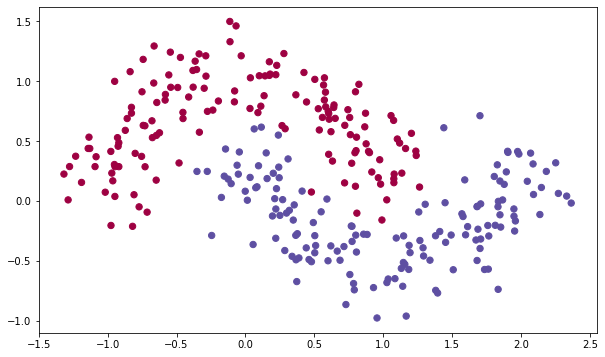

In [20]:
# Step 9.2: TEST
train_X, train_Y, test_X, test_Y = load_dataset()

Cost after epoch 0: 0.011189
Cost after epoch 100: 0.001330
Cost after epoch 200: 0.001168
Cost after epoch 300: 0.001068
Cost after epoch 400: 0.001105
Cost after epoch 500: 0.001189
Cost after epoch 600: 0.001066
Cost after epoch 700: 0.001108
Cost after epoch 800: 0.001082
Cost after epoch 900: 0.001054


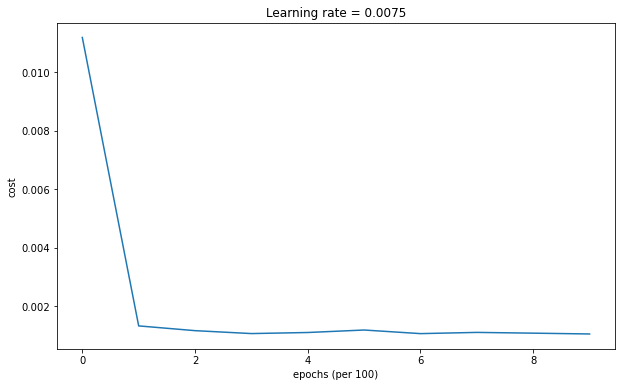

In [21]:
# CONSTANTS of a 4-layer model
n_x = train_X.shape[0]
n_h1 = 15
n_h2 = 7
n_h3 = 3
n_o = test_Y.shape[0]

layers_dims = [n_x, n_h1, n_h2, n_h3, n_o]

parameters = L_layer_model_adam(train_X, train_Y, layers_dims, mini_batch_size = 64, learning_rate = 0.0075,
                                num_epochs = 1000, print_cost = True, lambd = 0.1)

In [22]:
# Training Accuracy
pred_train = predict(train_X, train_Y, parameters)

Accuracy: 0.9933333333333334


In [23]:
# Test Accuracy
pred_test = predict(test_X, test_Y, parameters)

Accuracy: 0.98


In [24]:
# Step 10.1: load_2D_dataset

import scipy.io

def load_2D_dataset():
    data = scipy.io.loadmat('datasets/data.mat')
    train_X = data['X'].T
    train_Y = data['y'].T
    test_X = data['Xval'].T
    test_Y = data['yval'].T

    plt.scatter(train_X[0, :], train_X[1, :], c=train_Y, s=40, cmap=plt.cm.Spectral);
    
    return train_X, train_Y, test_X, test_Y

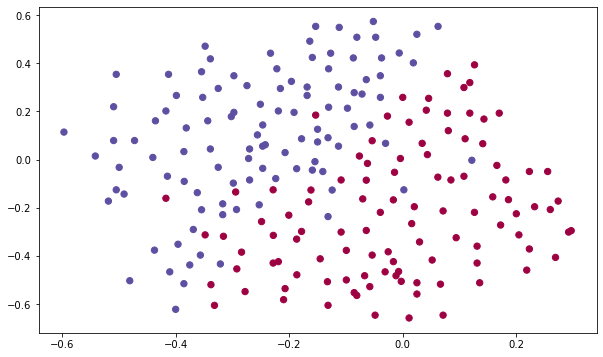

In [25]:
# Step 10.2: TEST
train_X, train_Y, test_X, test_Y = load_2D_dataset()

Cost after epoch 0: 0.013814
Cost after epoch 100: 0.004573
Cost after epoch 200: 0.004467
Cost after epoch 300: 0.004518
Cost after epoch 400: 0.004601
Cost after epoch 500: 0.004721
Cost after epoch 600: 0.004161
Cost after epoch 700: 0.004266
Cost after epoch 800: 0.004171
Cost after epoch 900: 0.004002


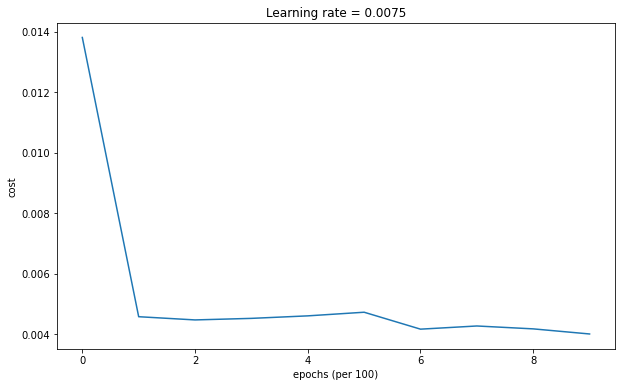

In [26]:
# CONSTANTS of a 4-layer model
n_x = train_X.shape[0]
n_h1 = 15
n_h2 = 7
n_h3 = 3
n_o = test_Y.shape[0]

layers_dims = [n_x, n_h1, n_h2, n_h3, n_o]

parameters = L_layer_model_adam(train_X, train_Y, layers_dims, mini_batch_size = 64, learning_rate = 0.0075,
                                num_epochs = 1000, print_cost = True, lambd = 0.1)

In [27]:
# Training Accuracy
pred_train = predict(train_X, train_Y, parameters)

Accuracy: 0.9431279620853081


In [28]:
# Test Accuracy
pred_test = predict(test_X, test_Y, parameters)

Accuracy: 0.9499999999999998


In [29]:
# Step 11.1: load_preprocess_data
import h5py

def load_preprocess_cat_data():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_X_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_Y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_X_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_Y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    # Reshape the training and test labels 
    train_Y = train_Y_orig.reshape((1, train_Y_orig.shape[0]))
    test_Y = test_Y_orig.reshape((1, test_Y_orig.shape[0]))
    
    # Reshape the training and test examples 
    train_X = train_X_orig.reshape(train_X_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
    test_X = test_X_orig.reshape(test_X_orig.shape[0], -1).T

    # Standardize data to have feature values between 0 and 1.
    train_X = train_X/255.
    test_X = test_X/255.
    
    # Visualize the data
    plt.scatter(train_X[0, :], train_X[1, :], c=train_Y, s=40, cmap=plt.cm.Spectral);
    
    return train_X, train_Y, test_X, test_Y, classes

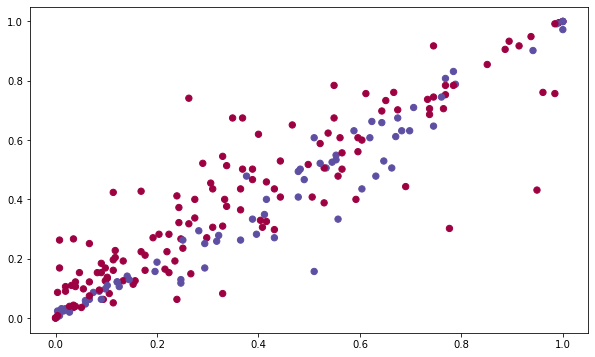

In [30]:
# Step 11.2: TEST
train_X, train_Y, test_X, test_Y, classes = load_preprocess_cat_data()

Cost after epoch 0: 0.019930
Cost after epoch 100: 0.004799
Cost after epoch 200: 0.002640
Cost after epoch 300: 0.001917
Cost after epoch 400: 0.001107
Cost after epoch 500: 0.000939


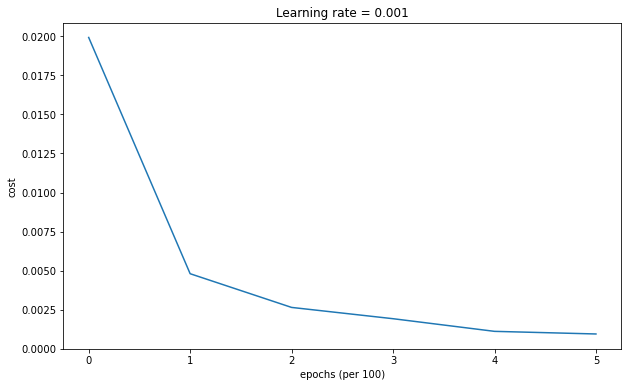

In [43]:
# CONSTANTS of a 4-layer model
n_x = train_X.shape[0]
n_h1 = 15
n_h2 = 7
n_h3 = 3
n_o = test_Y.shape[0]

layers_dims = [n_x, n_h1, n_h2, n_h3, n_o]

parameters = L_layer_model_adam(train_X, train_Y, layers_dims, mini_batch_size = 128, learning_rate = 0.001,
                                num_epochs = 600, print_cost = True, lambd = 0.9)

In [44]:
# Training Accuracy
pred_train = predict(train_X, train_Y, parameters)

Accuracy: 0.9999999999999998


In [45]:
# Test Accuracy
pred_test = predict(test_X, test_Y, parameters)

Accuracy: 0.7000000000000001
